## Manuscript figures
This notebook is for recreating the figures in the manuscript main text and supplemental text

In [1]:
import seaborn as sns
from pathlib import Path
from matplotlib import rc
%run python_scripts/PR_functions.py

In [2]:
wdir = Path(os.getcwd()).parent

In [3]:
results_dir = os.path.join(wdir, 'Results')

# If you are reproducing the analyses within this notebook and the subsequent notebooks: 
## 1) Comment out the line of code above this comment, i.e., results_dir = os.path.join(wdir, 'Results')
## 2) Uncomment the line of code below this line, i.e., results_dir = os.path.join(wdir, 'Reproduce_Results')
## 3) Run this cell.

# results_dir = os.path.join(wdir, 'Reproduce_Results')

##### If you have rerun the 6_increasing_permutation_analysis and/or the 2_run_periodicity_analysis notebooks and wish to use the new results in this notebook, you will need to manually update all "_node_finding_" folder names within this notebook to the new "_node_finding_" folder name that was generated.

In [4]:
TF_dir = "../annotation_files/TF_list"
core_node_dir = "../annotation_files/core_node_list"
output_dir = os.path.join('..', results_dir, "P-R_results")
pydl_file = "pydl_results.tsv"
dlxjtk_file = "dlxjtk_results.tsv"

file_dic = {"Scerevisiae_microarray":{"results": os.path.join('..', results_dir, "cell_cycle/Scerevisiae/microarray/node_finding_191004085621"),
                     "TF_file_col": ["Yeastract_TF_list.txt", "secondaryIdentifier"],
                     "core_file_col": ["yeast_cell_cycle_TFs.csv", "scere_id"]},
            "Scerevisiae_rnaseq":{"results": os.path.join('..', results_dir, "cell_cycle/Scerevisiae/rnaseq/node_finding_190411114935"),
                     "TF_file_col": ["Yeastract_TF_list.txt", "secondaryIdentifier"],
                     "core_file_col": ["yeast_cell_cycle_TFs.csv", "scere_id"]},
           "mouse_liver_MA": {"results": os.path.join('..', results_dir, "circadian_clock/mouse_liver/microarray/node_finding_190507125241"),
                     "TF_file_col": ["Mus_musculus_TF_AnimalTFDB3.txt", "Ensembl"],
                     "core_file_col": ["mouse_circadian_TFs.csv", "mouse_Ensembl_id"]},
           "mouse_liver_RS":{"results": os.path.join('..', results_dir, "circadian_clock/mouse_liver/rnaseq/node_finding_190426164820"),
                     "TF_file_col": ["Mus_musculus_TF_AnimalTFDB3.txt", "Ensembl"],
                     "core_file_col": ["mouse_circadian_TFs.csv", "mouse_Ensembl_id"]},
           "athaliana_LDHC":{"results": os.path.join('..', results_dir, "circadian_clock/athaliana/LDHC/node_finding_190425094026"),
                     "TF_file_col": ["Ath_TF_list_plantTFDB.txt", "Gene_ID"],
                     "core_file_col": ["plant_circadian_TFs.csv", "Arth_id"]},
           "athaliana_LL-LDHC":{"results": os.path.join('..', results_dir, "circadian_clock/athaliana/LL_LDHC/node_finding_200220154521"),
                     "TF_file_col": ["Ath_TF_list_plantTFDB.txt", "Gene_ID"],
                     "core_file_col": ["plant_circadian_TFs.csv", "Arth_id"]}}

# dataset : [Core, TF, total genes in data]
count_info = {"Scerevisiae_rnaseq": [17,307,5910],
           "Scerevisiae_microarray": [17,304,5814],
           "mouse_liver_MA": [15,1373,19750],
           "mouse_liver_RS": [14,1118,18388],
           "athaliana_LDHC": [11,1415,22484],
           "athaliana_LL-LDHC": [11,1415,22484]}

In [5]:
# Classes = core nodes
ap_cn_df_list = []
for file in os.listdir(output_dir):
    if file.endswith("precision.txt"):
        ap_cn_df_list.append(pd.read_csv(os.path.join(output_dir, file), index_col=0, sep="\t").T)

ap_cn_df = ap_cn_df_list[0].append(ap_cn_df_list[1:])
ap_cn_df.index.names = ['datasets']
ap_cn_df = ap_cn_df["full-Recall"]
ap_cn_df = ap_cn_df.reset_index()

split_col = ap_cn_df["datasets"].str.split("_", n = 3, expand = True)
new_cols_dlist = []

for index, row in split_col.iterrows():
    if row[0].startswith("a") or row[0].startswith("kf"):
        row = [i for i in row if i]
        new_cols_dlist.append(["_".join(row[:2]), "_".join(row[2:])])
    elif row[0].startswith("m"):
        row = [i for i in row if i]
        new_cols_dlist.append(["_".join(row[:3]), "_".join(row[3:])])
    elif row[0].startswith("S"):
        row = [i for i in row if i] 
        new_cols_dlist.append(["_".join(row[:2]), "_".join(row[2:])])

combined_scores = ['dl_PerReg', 'dl_PerReg_TF', 'dlxjtk_score', 'dl_score', 
                   'dlxjtk_score_TF', 'dl_score_TF']

single_scores = ['jtk_per_pval_norm', 'dl_reg_pval_norm', 'dl_p_per_norm', 'dl_reg_score', 
                 'dl_per_score', 'jtk_per_pval_norm_TF', 'dl_reg_pval_norm_TF', 
                 'dl_p_per_norm_TF', 'dl_reg_score_TF', 'dl_per_score_TF']

new_cols_type_dlist = []
for dm in new_cols_dlist:
    if dm[1] in combined_scores:
        dm.append("Combined Scores")
        if "TF" in dm[1]:
            dm.append("TF")
        else:
            dm.append("notTF")
    else:
        dm.append("Individual Scores")
        if "TF" in dm[1]:
            dm.append("TF")
        else:
            dm.append("notTF")
    new_cols_type_dlist.append(dm)
      
new_cols_df = pd.DataFrame(new_cols_dlist, columns=["Datasets", "Method", "Type", "TF"])

ap_cn_df["Datasets"]= new_cols_df["Datasets"]
ap_cn_df["Method"]= new_cols_df["Method"]
ap_cn_df["Type"]= new_cols_df["Type"]
ap_cn_df["TF"]= new_cols_df["TF"]
ap_cn_df.drop(columns=["datasets"], inplace=True)

baseline_dict = {}

for dataset, numbs_list in count_info.items():
    core, total_tf, total_genes = numbs_list
    total_baseline = core/total_genes
    tf_baseline = core/total_tf
    baseline_tf_cs = {"full-Recall":tf_baseline, "Datasets": dataset, "Method": "baseline", 
                   "Type": "Combined Scores", "TF": "TF"}
    baseline_tf_is = {"full-Recall":tf_baseline, "Datasets": dataset, "Method": "baseline", 
                   "Type": "Individual Scores", "TF": "TF"}

    baseline_nottf_is = {"full-Recall":total_baseline, "Datasets": dataset, "Method": "baseline", 
                      "Type": "Individual Scores", "TF": "notTF"}
    baseline_nottf_cs = {"full-Recall":total_baseline, "Datasets": dataset, "Method": "baseline", 
                      "Type": "Combined Scores", "TF": "notTF"}
    
    baseline_dict[dataset + "tf_cs"] = baseline_tf_cs
    baseline_dict[dataset + "tf_is"] = baseline_tf_is
    baseline_dict[dataset + "nottf_is"] = baseline_nottf_is
    baseline_dict[dataset + "nottf_cs"] = baseline_nottf_cs

baseline_df = pd.DataFrame.from_dict(baseline_dict).T
ap_cn_base_df = ap_cn_df.append(baseline_df, ignore_index=True, sort=True)

In [6]:
# Classes = TFs
ap_tf_df_list = []
for file in os.listdir(output_dir):
    if file.endswith("precision_idTF.txt"):
        ap_tf_df_list.append(pd.read_csv(os.path.join(output_dir, file), index_col=0, sep="\t").T)

ap_tf_df = ap_tf_df_list[0].append(ap_tf_df_list[1:])
ap_tf_df.index.names = ['datasets']
ap_tf_df = ap_tf_df["full-Recall"]
ap_tf_df = ap_tf_df.reset_index()

split_col = ap_tf_df["datasets"].str.split("_", n = 3, expand = True)
new_cols_dlist = []

for index, row in split_col.iterrows():
    if row[0].startswith("a") or row[0].startswith("kf"):
        row = [i for i in row if i]
        new_cols_dlist.append(["_".join(row[:2]), "_".join(row[2:])])
    elif row[0].startswith("m"):
        row = [i for i in row if i]
        new_cols_dlist.append(["_".join(row[:3]), "_".join(row[3:])])
    elif row[0].startswith("S"):
        row = [i for i in row if i] 
        new_cols_dlist.append(["_".join(row[:2]), "_".join(row[2:])])

new_cols_type_dlist = []
for dm in new_cols_dlist:
    if dm[1] in combined_scores:
        dm.append("Combined Scores")
    else:
        dm.append("Individual Scores")
    new_cols_type_dlist.append(dm)
      
new_cols_df = pd.DataFrame(new_cols_dlist, columns=["Datasets", "Method", "Type"])

ap_tf_df["Datasets"]= new_cols_df["Datasets"]
ap_tf_df["Method"]= new_cols_df["Method"]
ap_tf_df["Type"]= new_cols_df["Type"]
ap_tf_df.drop(columns=["datasets"], inplace=True)

baseline_dict = {}

for dataset, numbs_list in count_info.items():
    _, total_tf, total_genes = numbs_list
    baseline = total_tf/total_genes
    baseline_cs = {"full-Recall":baseline, "Datasets": dataset, "Method": "baseline", 
                   "Type": "Combined Scores"}
    baseline_is = {"full-Recall":baseline, "Datasets": dataset, "Method": "baseline", 
                   "Type": "Individual Scores"}
    
    baseline_dict[dataset + "_cs"] = baseline_cs
    baseline_dict[dataset + "_is"] = baseline_is

baseline_df = pd.DataFrame.from_dict(baseline_dict).T
single_baselin_df = baseline_df[baseline_df['Type'] != 'Individual Scores']
ap_tf_base_df = ap_tf_df.append(single_baselin_df, ignore_index=True, sort=True)

## Fig 2. Identifying Core Genes Among Transcription Factors.
Average precision of classifiers identifying core from non-core TFs among all TFs by combined metrics (left) and individual metrics (right) (Table 1) as well as the baseline average precision of a random classifier, for each dataset (Table 2).

In [1]:
# the warnings this cell produces can be ignored
ap_cn_tf_df = ap_cn_base_df[ap_cn_base_df["TF"] == "TF"]

ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_PerReg_TF','PerReg')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dlxjtk_score_TF','DLxJTK')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('jtk_per_pval_norm_TF','JTK Per p-val')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_reg_pval_norm_TF','DL Reg p-val')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_p_per_norm_TF','DL Per p-val')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_score_TF','DL')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_reg_score_TF','DL Reg Score')
ap_cn_tf_df['Method'] = ap_cn_tf_df['Method'].str.replace('dl_per_score_TF','DL Per Score')

ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('athaliana_LDHC','A. thaliana (LDHC) MA')
ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('athaliana_LL-LDHC','A. thaliana (LL_LDHC) MA')
ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('mouse_liver_RS','M. musculus RNA')
ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('mouse_liver_MA','M. musculus MA')
ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('Scerevisiae_rnaseq','S. cerevisiae RNA')
ap_cn_tf_df['Datasets'] = ap_cn_tf_df['Datasets'].str.replace('Scerevisiae_microarray','S. cerevisiae MA')

In [8]:
fig1_dataset_order = ['A. thaliana (LDHC) MA', 'A. thaliana (LL_LDHC) MA', 'M. musculus MA', 'M. musculus RNA', 'S. cerevisiae MA', 'S. cerevisiae RNA']

In [9]:
palette = {'JTK Per p-val': 'C0',
 'DL Per Score': 'C11',
 'DL': 'C22',
 'DL Per p-val': 'C33',
 'DL Reg Score': 'C44',
 'PerReg': 'C55',
 'baseline': 'k',
 'DLxJTK': 'r',
 'DL Reg p-val': 'C88'}

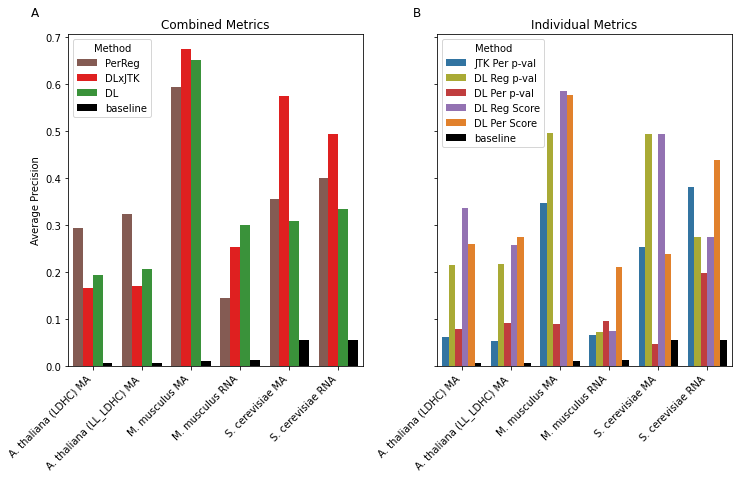

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(5.2*2, 3.297*2))

sns.barplot(x="Datasets", y="full-Recall", data=ap_cn_tf_df[ap_cn_tf_df["Type"] == "Combined Scores"],
            hue="Method", ax=ax1, order=fig1_dataset_order, palette=palette)
sns.barplot(x="Datasets", y="full-Recall", data=ap_cn_tf_df[ap_cn_tf_df["Type"] == "Individual Scores"],
            hue="Method", ax=ax2, order=fig1_dataset_order, palette=palette)

ax1.set_ylabel('Average Precision')
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.tick_params(axis='x',labelsize=10)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax2.tick_params(axis='x',labelsize=10)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right")

ax1.set_title("Combined Metrics")
ax2.set_title("Individual Metrics")

plt.gcf().text(0.05, 0.98, 'A', fontsize=12)
plt.gcf().text(0.56, 0.98, 'B', fontsize=12)

plt.tight_layout()

## Fig 4. Identifying Core Genes Among All Genes.
Average precision of classifiers identifying core from non-core TFs among all genes by combined metrics andindividual metrics (Table 1) as well as the baseline average precision of a random classifier, for each dataset (Table 2).

In [2]:
# the warnings this cell produces can be ignored
ap_cn_notTF_df = ap_cn_base_df[ap_cn_base_df["TF"] != "TF"]

ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_PerReg','PerReg')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dlxjtk_score','DLxJTK')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('jtk_per_pval_norm','JTK Per p-val')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_reg_pval_norm','DL Reg p-val')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_p_per_norm','DL Per p-val')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_score','DL')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_reg_score','DL Reg Score')
ap_cn_notTF_df['Method'] = ap_cn_notTF_df['Method'].str.replace('dl_per_score','DL Per Score')

ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('athaliana_LDHC','A. thaliana (LDHC) MA')
ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('athaliana_LL-LDHC','A. thaliana (LL_LDHC) MA')
ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('mouse_liver_RS','M. musculus RNA')
ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('mouse_liver_MA','M. musculus MA')
ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('Scerevisiae_rnaseq','S. cerevisiae RNA')
ap_cn_notTF_df['Datasets'] = ap_cn_notTF_df['Datasets'].str.replace('Scerevisiae_microarray','S. cerevisiae MA')

In [12]:
fig2_dataset_order = ['A. thaliana (LDHC) MA', 'A. thaliana (LL_LDHC) MA', 'M. musculus MA', 'M. musculus RNA', 'S. cerevisiae MA', 'S. cerevisiae RNA']

In [13]:
nonTF_baseline = ap_cn_notTF_df[ap_cn_notTF_df["Method"] == "baseline"]
nonTF_CM_baseline = {'S. cerevisiae RNA': [5.24, 3], 'S. cerevisiae MA': [4.24, 3],'M. musculus MA': [2.24, 10],
                     'M. musculus RNA': [3.24, 10], 'A. thaliana (LDHC) MA':  [0.24, 10],'A. thaliana (LL_LDHC) MA': [1.24, 10]}

nonTF_IM_baseline = {'S. cerevisiae RNA': [5.3, 3], 'S. cerevisiae MA': [4.3, 3],'M. musculus MA': [2.3, 10],
                     'M. musculus RNA': [3.3, 10], 'A. thaliana (LDHC) MA':  [0.3, 10],'A. thaliana (LL_LDHC) MA': [1.3, 10]}

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(5.2*2, 3.297*2))

sns.barplot(x="Datasets", y="full-Recall", data=ap_cn_notTF_df[ap_cn_notTF_df["Type"] == "Combined Scores"],
            hue="Method", ax=ax1, order=fig1_dataset_order, palette=palette)
sns.barplot(x="Datasets", y="full-Recall", data=ap_cn_notTF_df[ap_cn_notTF_df["Type"] == "Individual Scores"],
            hue="Method", ax=ax2, order=fig1_dataset_order, palette=palette)

ax1.set_ylabel('Average Precision')
ax2.set_ylabel('')
ax1.tick_params(axis='x',labelsize=10)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax2.tick_params(axis='x',labelsize=10)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right")

ax1.set_title("Combined Metrics")
ax2.set_title("Individual Metrics")

for index, row in nonTF_baseline.iterrows():
    if row[3] == 'Combined Scores':
        x_loc, y_multipler = nonTF_CM_baseline[row[0]]
        y_loc = row[4]
        ax1.text(x_loc, y_loc*y_multipler, str(round(y_loc,4)), fontsize=8, rotation=90)
    else:
        x_loc, y_multipler = nonTF_IM_baseline[row[0]]
        y_loc = row[4]
        ax2.text(x_loc, y_loc*y_multipler, str(round(y_loc,4)), fontsize=8, rotation=90)

plt.gcf().text(0.05, 0.98, 'A', fontsize=12)
plt.gcf().text(0.56, 0.98, 'B', fontsize=12)
       
plt.tight_layout()

## Fig 5. Identifying Transcription Factors Among All Genes.
Average precision of classifiers identifying TFs from non-TFs among all genes by combined metrics and individual metrics (Table 1) as well as the baseline average precision of a random classifier, for each dataset (Table 2).

In [15]:
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_PerReg','PerReg')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dlxjtk_score','DLxJTK')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('jtk_per_pval_norm','JTK Per p-val')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_reg_pval_norm','DL Reg p-val')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_p_per_norm','DL Per p-val')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_score','DL')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_reg_score','DL Reg Score')
ap_tf_base_df['Method'] = ap_tf_base_df['Method'].str.replace('dl_per_score','DL Per Score')

ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('athaliana_LDHC','A. thaliana (LDHC) MA')
ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('athaliana_LL-LDHC','A. thaliana (LL_LDHC) MA')
ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('mouse_liver_RS','M. musculus RNA')
ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('mouse_liver_MA','M. musculus MA')
ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('Scerevisiae_rnaseq','S. cerevisiae RNA')
ap_tf_base_df['Datasets'] = ap_tf_base_df['Datasets'].str.replace('Scerevisiae_microarray','S. cerevisiae MA')

In [16]:
fig, _ = plt.subplots(figsize=(15,12))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

cp1 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("A. thaliana (LDHC) MA", regex=False)],
            hue="Method", dodge=False, ax=ax1, ci=None, palette=palette)
ax1.set_title("$\it{A. thaliana}$ (LDHC) MA")
ax1.set_ylim(0.0, 0.1)
ax1.set_ylabel('Average Precision', fontsize=12)
ax1.set_xlabel("")
ax1.set(xticklabels=[])
ax1.legend_.remove()

cp2 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("A. thaliana (LL_LDHC) MA", regex=False)],
            hue="Method", dodge=False, ax=ax2, ci=None, palette=palette)
ax2.set_title("$\it{A. thaliana}$ (LL_LDHC) MA")
ax2.set_ylabel("")
ax2.set_ylim(0.0, 0.1)
ax2.set_xlabel("")
ax2.set(xticklabels=[])
ax2.legend_.remove()

cp3 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("M. musculus RNA")],
            hue="Method", dodge=False, ax=ax3, ci=None, palette=palette)
ax3.set_title("$\it{M. musculus}$ RNA")
ax3.set_ylabel("")
ax3.set_ylim(0.0, 0.1)
ax3.set_xlabel("")
ax3.set(xticklabels=[])
ax3.legend_.remove()

cp4 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("M. musculus MA")],
            hue="Method", dodge=False, ax=ax4, ci=None, palette=palette)
ax4.set_title("$\it{M. musculus}$ MA")
ax4.set_ylim(0.0, 0.1)
ax4.set_ylabel('Average Precision', fontsize=12)
ax4.set_xlabel("")
ax4.tick_params(axis='x',labelsize=10)
ax4.set_xticklabels(ax4.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax4.legend_.remove()

cp5 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("S. cerevisiae RNA")],
            hue="Method", dodge=False, ax=ax5, ci=None, palette=palette)
ax5.set_title("$\it{S. cerevisiae}$ RNA")
ax5.set_ylabel("")
ax5.set_ylim(0.0, 0.1)
ax5.set_xlabel("")
ax5.tick_params(axis='x',labelsize=10)
ax5.set_xticklabels(ax5.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax5.legend_.remove()

cp6 = sns.barplot(x="Method", y="full-Recall", data=ap_tf_base_df[ap_tf_base_df["Datasets"].str.contains("S. cerevisiae MA")],
            hue="Method", dodge=False, ax=ax6, ci=None, palette=palette)
ax6.set_title("$\it{S. cerevisiae}$ MA")
ax6.set_ylabel("")
ax6.set_ylim(0.0, 0.1)
ax6.set_xlabel("")
ax6.tick_params(axis='x',labelsize=10)
ax6.set_xticklabels(ax6.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax6.legend_.remove()

plt.tight_layout()

# Fig S1 - S6. Precision-recall curves of classifiers identifying core from non-core TFs among all genes (left two columns) and among only TFs (right two columns) in each dataset.

In [17]:
sp_converter = {"Scerevisiae_rnaseq": 'yeast_rna',
                "Scerevisiae_microarray": 'yeast_ma',
                "mouse_liver_MA": 'mouse_ma',
                "mouse_liver_RS": 'mouse_rna',
                "athaliana_LDHC": 'plant_LDHC',
                "athaliana_LL-LDHC": 'plant_LL_LDHC'}

method_converter = {'dl_PerReg_TF':'PerReg',
                    'dlxjtk_score_TF':'DLxJTK',
                    'jtk_per_pval_norm_TF':'JTK Per p-val',
                    'dl_reg_pval_norm_TF':'DL Reg p-val',
                    'dl_p_per_norm_TF':'DL Per p-val',
                    'dl_score_TF':'DL',
                    'dl_reg_score_TF':'DL Reg Score',
                    'dl_per_score_TF':'DL Per Score',
                    'dl_PerReg':'PerReg',
                    'dlxjtk_score':'DLxJTK',
                    'jtk_per_pval_norm':'JTK Per p-val',
                    'dl_reg_pval_norm':'DL Reg p-val',
                    'dl_p_per_norm':'DL Per p-val',
                    'dl_score':'DL',
                    'dl_reg_score':'DL Reg Score',
                    'dl_per_score':'DL Per Score'}

method_graph_idx = {'dl_PerReg': 1,
                    'dlxjtk_score':2,
                    'dl_score':5,
                    'jtk_per_pval_norm':6,
                    'dl_reg_score':9,
                    'dl_reg_pval_norm':10,
                    'dl_per_score':13,
                    'dl_p_per_norm':14,
                    'dl_PerReg_TF':3,
                    'dlxjtk_score_TF':4,
                    'dl_score_TF':7,
                    'jtk_per_pval_norm_TF':8,
                    'dl_reg_score_TF':11,
                    'dl_reg_pval_norm_TF':12,
                    'dl_per_score_TF':15,
                    'dl_p_per_norm_TF':16}

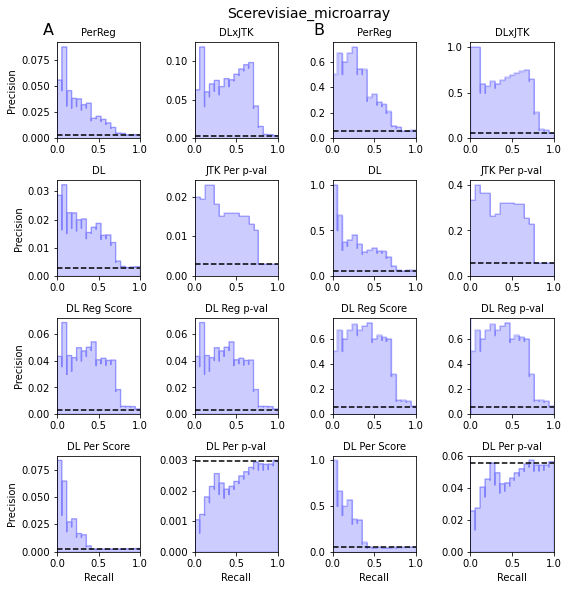

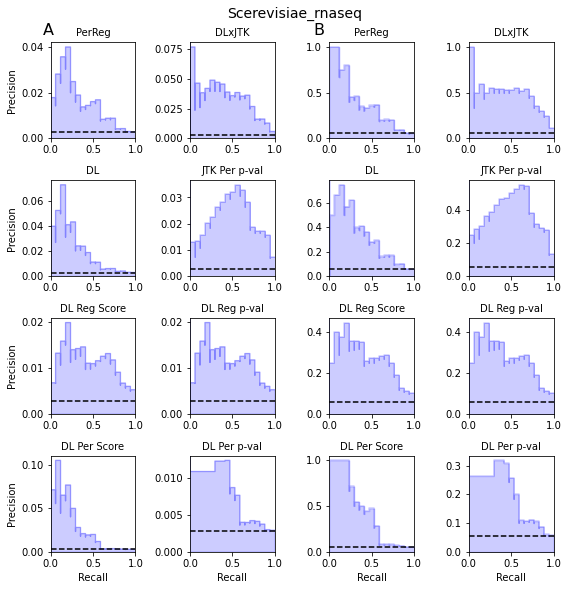

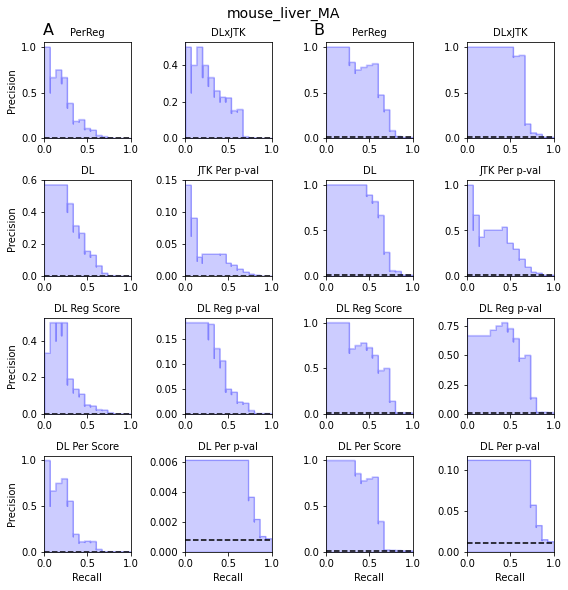

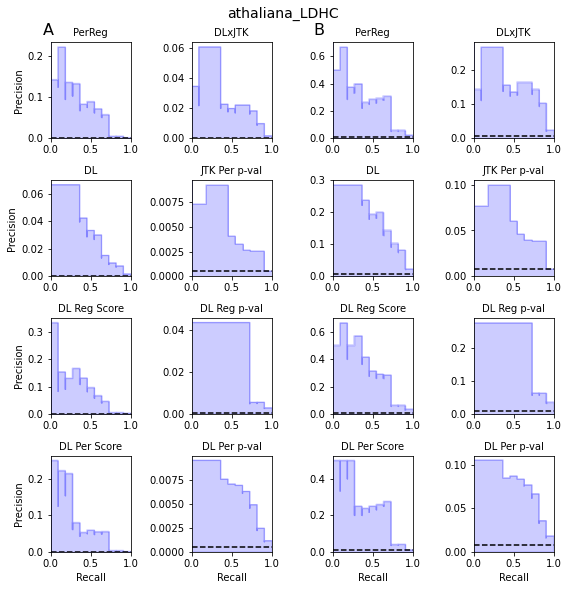

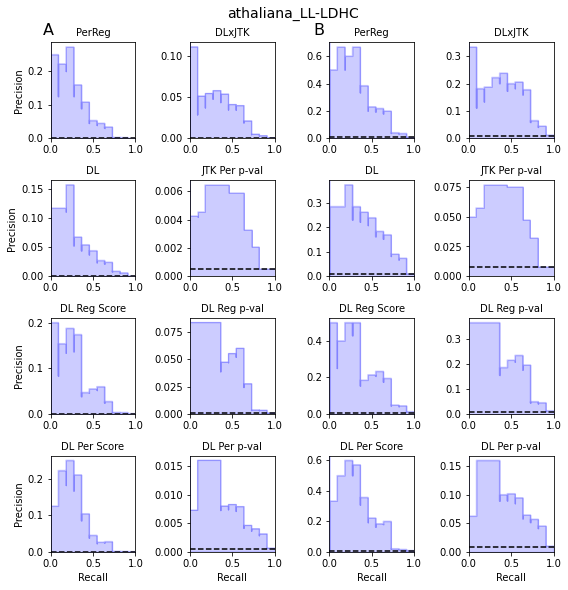

In [19]:
for (sp, info) in file_dic.items():
    graph_count = 1
    tf_graph_count = 9
    fig = plt.figure(figsize=(8,8))
    lines = []
    labels = []
    sp_file_list = []
    for file in os.listdir(output_dir):
        if file.endswith("P-R.txt") and sp in file:
            sp_file_list.append(file)

    sp_file_list.sort()
    sp_file_list = sp_file_list[:12] + sp_file_list[-2:] + sp_file_list[12:14]
    for file in sp_file_list:
        file_list = file.split('_')
        for idx, i in enumerate(file_list):
            if i == "dl":
                method = "_".join(file_list[idx:-1])
            elif i == "jtk":
                method = "_".join(file_list[idx:-1])
            elif i == "dlxjtk":
                method = "_".join(file_list[idx:-1])

        core_node_list = pd.read_csv(os.path.join(core_node_dir, info["core_file_col"][0]), index_col=0)
        core_node_list = core_node_list[info["core_file_col"][1]].tolist()

        dlxjtk_df = pd.read_csv(os.path.join(info["results"], dlxjtk_file), sep="\t", skiprows=3, index_col=0)
        dlxjtk_df.index.rename("genes", inplace=True)

        p_labels, n_labels, total_labels, absent_p_labels = P_and_N_labels(core_node_list, dlxjtk_df)
        no_skill_coord = float(p_labels) / (float(p_labels) + float(n_labels))

        tf_file = os.path.join(TF_dir, info["TF_file_col"][0])
        tf_labels_df = filter_tf(tf_file, info["TF_file_col"][1], dlxjtk_df)

        tf_p_labels, tf_n_labels, tf_total_labels, tf_absent_p_labels = P_and_N_labels(core_node_list, tf_labels_df)
        TF_no_skill_coord = float(tf_p_labels) / (float(tf_p_labels) + float(tf_n_labels))

        pr_df = pd.read_csv(os.path.join(output_dir, file), sep="\t")

        if file.endswith("TF_P-R.txt"):
            plt.subplot(4,4,method_graph_idx[method])
            plot_PR_curve(pr_df)
            plt.plot([0, 1], [TF_no_skill_coord, TF_no_skill_coord], linestyle='--', color="k")
            if sp.startswith("S") or sp.startswith("K5"):
                plt.title("{}".format(method_converter[method]), fontdict={"fontsize": 10})
            else:
                plt.title("{}".format(method_converter[method]), fontdict={"fontsize": 10})
            if method_graph_idx[method] in [1, 5, 9, 13]:
                plt.ylabel('Precision', size=10)
            if method_graph_idx[method] >= 13:
                    plt.xlabel('Recall', size=10)
            tf_graph_count += 1

        else:
            plt.subplot(4,4,method_graph_idx[method])
            plot_PR_curve(pr_df)
            plt.plot([0, 1], [no_skill_coord, no_skill_coord], linestyle='--', color="k")
            if sp.startswith("S") or sp.startswith("K5"):
                plt.title("{}".format(method_converter[method]), fontdict={"fontsize": 10})
            else:
                plt.title("{}".format(method_converter[method]), fontdict={"fontsize": 10})
            if method_graph_idx[method] in [1, 5, 9, 13]:
                plt.ylabel('Precision', size=10)
            if method_graph_idx[method] >= 13:
                    plt.xlabel('Recall', size=10)
            graph_count += 1        
    
    plt.gcf().text(0.08, 0.97, 'A', fontsize=16)
    plt.gcf().text(0.55, 0.97, 'B', fontsize=16)
    plt.gcf().text(0.40, 0.999, sp, fontsize=14)
    plt.tight_layout()
#     plt.savefig('%s_P-R_curves.svg' %sp)

## Fig S7. The number of permutations for computing DL Reg p-val vs. thenumber of unique DL Reg p-values.
The number of unique values of DL Reg p-val per total number of genes before filtering for transcription factors (blue line) and after filtering for transcription factors (orange line) for the A. thaliana LDHC dataset as afunction of the number of permutations chosen for the DL algorithm.

In [34]:
cpu_time_df = pd.read_csv(os.path.join('..', results_dir, "Arth_Permutations_test/arth_pyDL_reg_permutations.csv"))
ax = sns.lineplot(x="Number of Permutations (Million)", y="Total # of Unique Scores / Total # of Genes", data=cpu_time_df, hue="Filter", markers=True)
plt.tight_layout()